In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix

In [2]:
datagen = ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   preprocessing_function=preprocess_input)

In [3]:
training_set = datagen.flow_from_directory(r'D:\Desktop\Projects\Fruits_131\fruits-360_dataset\fruits-360\Training',
                                           target_size = [256,256],
                                           shuffle = False,
                                           batch_size =16)

Found 67692 images belonging to 131 classes.


In [4]:
val_set = datagen.flow_from_directory(r'D:\Desktop\Projects\Fruits_131\fruits-360_dataset\fruits-360\Test',
                                           target_size = [256,256],
                                           shuffle = False,
                                           batch_size =16)

Found 22688 images belonging to 131 classes.


In [5]:
resnet = ResNet50(input_shape=[256,256,3],weights='imagenet',include_top=False)
for layer in resnet.layers:
    layer.trainable=False
    
x = tf.keras.layers.Flatten()(resnet.output)

x = tf.keras.layers.Dense(units=131,activation='softmax')(x)

model = Model(inputs=resnet.input, outputs=x)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [6]:
model.compile(optimizer='RMSprop',loss='categorical_crossentropy',metrics =['accuracy'])
history = model.fit(training_set,validation_data=val_set,epochs=5,batch_size=16)

Epoch 1/5
4231/4231 [==============================] - 2942s 695ms/step - loss: 29.9720 - accuracy: 0.5610 - val_loss: 9.9534 - val_accuracy: 0.8018
Epoch 2/5
4231/4231 [==============================] - 3021s 714ms/step - loss: 4.5485 - accuracy: 0.8873 - val_loss: 4.6409 - val_accuracy: 0.8939
Epoch 3/5
4231/4231 [==============================] - 2914s 689ms/step - loss: 2.3131 - accuracy: 0.9407 - val_loss: 5.2084 - val_accuracy: 0.8932
Epoch 4/5
4231/4231 [==============================] - 2397s 567ms/step - loss: 1.6149 - accuracy: 0.9572 - val_loss: 2.8724 - val_accuracy: 0.9319
Epoch 5/5
4231/4231 [==============================] - 6352s 2s/step - loss: 0.9891 - accuracy: 0.9708 - val_loss: 2.9784 - val_accuracy: 0.9386


In [7]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

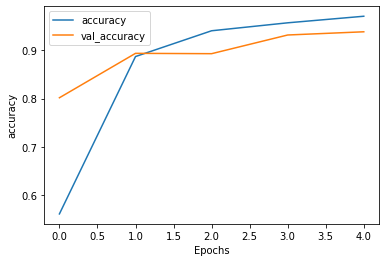

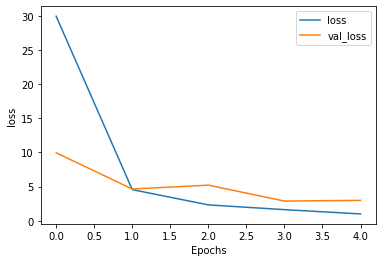

In [8]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")